<a href="https://colab.research.google.com/github/akivig1601/FOML/blob/main/currencyapp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import os

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
!unzip gdrive/My\Drive/Indian_Currency_zip.zip

Archive:  gdrive/MyDrive/Indian_Currency_zip.zip
   creating: Indian_Currency/Indian currency dataset v1/
   creating: Indian_Currency/Indian currency dataset v1/test/
  inflating: Indian_Currency/Indian currency dataset v1/test/10__206.jpg  
  inflating: Indian_Currency/Indian currency dataset v1/test/10__247.jpg  
  inflating: Indian_Currency/Indian currency dataset v1/test/10__276.jpg  
  inflating: Indian_Currency/Indian currency dataset v1/test/10__324.jpg  
  inflating: Indian_Currency/Indian currency dataset v1/test/10__358.jpg  
  inflating: Indian_Currency/Indian currency dataset v1/test/10__388.jpg  
  inflating: Indian_Currency/Indian currency dataset v1/test/10__443.jpg  
  inflating: Indian_Currency/Indian currency dataset v1/test/100__371.jpg  
  inflating: Indian_Currency/Indian currency dataset v1/test/100__386.jpg  
  inflating: Indian_Currency/Indian currency dataset v1/test/100__389.jpg  
  inflating: Indian_Currency/Indian currency dataset v1/test/100__415.jpg  
  i

In [6]:
import tensorflow as tf 
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from pathlib import Path

In [7]:
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, 
                                                                    shear_range = 0.2, 
                                                                    zoom_range = 0.2, 
                                                                    horizontal_flip = True, 
                                                                    vertical_flip = True)

train_data = data_augmentation.flow_from_directory( directory = '/content/Indian_Currency/Indian currency dataset v1/training', 
                                                   target_size = (256,256), 
                                                   class_mode = "categorical", 
                                                   batch_size = 32)

Found 3566 images belonging to 8 classes.


In [8]:
validate_data = data_augmentation.flow_from_directory( directory = '/content/Indian_Currency/Indian currency dataset v1/validation',
                                                      target_size = (256,256),
                                                      class_mode = "categorical")

Found 345 images belonging to 8 classes.


In [9]:
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("currency_detector_smal_model.h5", monitor = 'accuracy', verbose = 1, 
                             save_best_only = True, 
                             save_weights_only = False, 
                             mode = 'auto', save_freq = 1)
early = EarlyStopping(monitor = 'accuracy', min_delta = 0.001, patience = 5, verbose = 1, mode = 'auto')
#early = EarlyStopping()

In [10]:
# import ResNet50
my_new_model = tf.keras.applications.resnet50.ResNet50(
      include_top = False,
      weights = 'imagenet',
      pooling = 'avg')

num_classes = 8
classes = list(train_data.class_indices.keys())
class_count = len(classes)
my_new_model = Sequential()
my_new_model.add(Conv2D(32,(3,3), input_shape=(256,256,3), activation='relu'))
my_new_model.add(MaxPooling2D(pool_size=(2,2)))

my_new_model.add(Conv2D(32,(3,3),activation='relu'))
my_new_model.add(MaxPooling2D(pool_size=(2,2)))
my_new_model.add(Flatten())
my_new_model.add(Dense(units = 8 ,activation = 'relu'))

my_new_model.add(Dense (units = 8, activation = 'softmax'))

my_new_model.layers[0].trainable = False

# compile the model with adam optimizer, categorical_croosentropy loss function
my_new_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


94781440/94765736 [==============================] - 1s 0us/step


In [11]:
my_new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 123008)            0         
_________________________________________________________________
dense (Dense)                (None, 8)                 984072    
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 7

In [12]:
torch.cuda.is_available()

False

In [13]:
def get_default_device():
    """Picking GPU if available or else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
device = get_default_device()

In [14]:
my_new_model.fit(
          train_data,
          epochs = 50,
          validation_data = validate_data,
          #batch_size = 32,
          callbacks = [early,checkpoint])

     16/Unknown - 59s 4s/step - loss: 2.4756 - accuracy: 0.1250
Epoch 00001: accuracy improved from 0.12277 to 0.12500, saving model to currency_detector_smal_model.h5
     17/Unknown - 63s 4s/step - loss: 2.4523 - accuracy: 0.1305
Epoch 00001: accuracy improved from 0.12500 to 0.13051, saving model to currency_detector_smal_model.h5
     18/Unknown - 66s 4s/step - loss: 2.4316 - accuracy: 0.1267
Epoch 00001: accuracy did not improve from 0.13051


KeyboardInterrupt: ignored

In [15]:
from keras.models import model_from_json
model_json = my_new_model.to_json()
with open("resnet_50_model.json", "w") as json_file:
    json_file.write(model_json)

In [16]:
class_labels = ['10','100','20','200','2000','50','500','Background']

In [17]:
from keras.preprocessing import image as image_utils

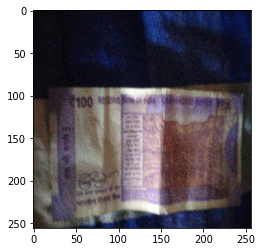

In [18]:
from tensorflow.keras.preprocessing import image

img =  image.load_img("/content/Indian_Currency/Indian currency dataset v1/validation/100/100_val_38.jpg", target_size=(256,256))
plt.imshow(img)

In [ ]:
import glob
# Find all *.jpg files in the directory
file_name_list = glob.glob('../input/indian-currency-notes/indian_currency_new/validation/100/100_val_33.jpg')
print(len(file_name_list))
for file_name in file_name_list:
    prediction(file_name)

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json

In [21]:
json_file = open('/content/resnet_50_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
#loaded_model.load_weights("/content/currency_detector_2.4GB_earlyStopping_model.h5")
print("Loaded model from disk")
loaded_model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

# tf.saved_model.save(model, saved_model_dir) 

# converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) 
# tflite_model = converter.convert()

# with open('model.tflite', 'wb') as f:
#   f.write(tflite_model)

Loaded model from disk


In [22]:
class_labels = ['10','100','20','200','2000','50','500','Background']

In [23]:
!pip install gTTS
!pip install pyttsx3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from gtts import gTTS 
from tensorflow.keras.preprocessing import image
import os 
import pyttsx3      
def prediction(file_name):
    img = image.load_img(file_name, target_size=(256,256))
    image_to_test = image.img_to_array(img)
    list_of_images = np.expand_dims(image_to_test, axis=0)
    results = loaded_model.predict(list_of_images)
    single_result = results[0]    
    most_likely_class_index = int(np.argmax(single_result))
    class_likelihood = single_result[most_likely_class_index]
    class_label = class_labels[most_likely_class_index]
    print(file_name)
    print("This is image is a {} - Likelihood: {: .2f}".format(class_label, class_likelihood))   
    tts(class_label,class_likelihood)

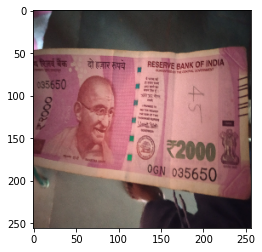

In [25]:
img = image.load_img("/content/Indian_Currency/Indian currency dataset v1/test/2000__359.jpg", target_size=(256,256))
plt.imshow(img)

In [26]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from pydub import AudioSegment
import IPython

def tts(class_label,class_likelihood):
    language='en'
    
    # if no currency detected or uploaded image is  bagkground
    if(class_label=="Background"):
        
        mytext=' sorry but i am detecting only  the'+class_label+', please hold the note under the camera.'
    else:
        mytext="This is  {} Rs note, and I am  {: .2f} % sure of it".format(class_label, class_likelihood*100)
        
    # gTTS() converts text into the audio supports multiple languages.    
    myobj = gTTS(text=mytext, lang=language, slow=False)
    
    #store audio result 
    file='result.mp3'
    myobj.save(file) 

In [28]:
import glob
# Find all *.jpg files in the directory
file_name_list = glob.glob('/content/Indian_Currency/Indian currency dataset v1/test/*.jpg')
print(len(file_name_list))
for file_name in file_name_list:
    # print the file name 
    print(file_name)
    
    #predict the currency 
    prediction(file_name)

91
/content/Indian_Currency/Indian currency dataset v1/test/100_270.jpg
/content/Indian_Currency/Indian currency dataset v1/test/100_270.jpg
This is image is a 500 - Likelihood:  1.00
/content/Indian_Currency/Indian currency dataset v1/test/200.__254.jpg
/content/Indian_Currency/Indian currency dataset v1/test/200.__254.jpg
This is image is a 20 - Likelihood:  0.98
/content/Indian_Currency/Indian currency dataset v1/test/500__37.jpg
/content/Indian_Currency/Indian currency dataset v1/test/500__37.jpg
This is image is a 500 - Likelihood:  1.00
/content/Indian_Currency/Indian currency dataset v1/test/100__371.jpg
/content/Indian_Currency/Indian currency dataset v1/test/100__371.jpg
This is image is a 500 - Likelihood:  1.00
/content/Indian_Currency/Indian currency dataset v1/test/100_371.jpg
/content/Indian_Currency/Indian currency dataset v1/test/100_371.jpg
This is image is a 500 - Likelihood:  1.00
/content/Indian_Currency/Indian currency dataset v1/test/50__345.jpg
/content/Indian_Cu

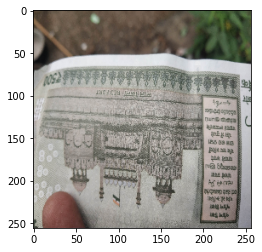

In [33]:
file_to_predict = "/content/Indian_Currency/Indian currency dataset v1/test/500__262.jpg"

# display currency image 
img = image.load_img(file_to_predict, target_size=(256,256))
plt.imshow(img)

In [32]:
path='./result.mp3' 
    
IPython.display.Audio(path)